<!-- Task Title -->

<div style="background-color: #708d90; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Phishing URL Detection🔍🤖</h1>
</div>

# Introduction
Phishing is a prevalent cybersecurity threat that exploits human trust to steal sensitive information such as login credentials, financial data, and personal details. These attacks often use deceptive URLs to lure victims into providing their information on fake websites. The Phishing URL Detection system seeks to mitigate this risk by developing a machine learning model that can distinguish between phishing and legitimate URLs. The system's Graphical user interface enables users to input URLs and receive immediate feedback on their legitimacy.


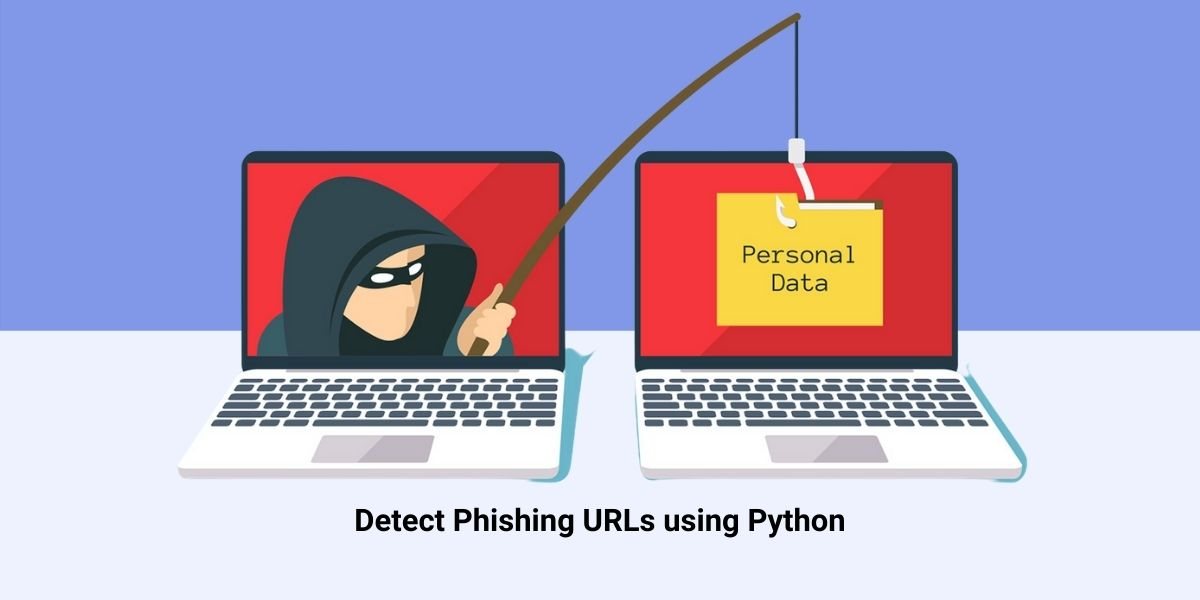


## Phishing Detection Dataset Overview

This dataset consists of 11,430 URLs, each with 87 extracted features, designed for benchmarking machine learning models in phishing detection.

The dataset is balanced, with an equal number of phishing and legitimate URLs.

**The features are categorized into three types:**

- 56 derived from the structure and syntax of URLs
- 24 from the content of the corresponding web pages
- and 7 from external service queries.

The goal is to develop a model that can accurately distinguish between phishing and legitimate URLs.

# Necessary Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pickle
pd.set_option('display.max_columns', None)

# Import Dataset

In [4]:
df=pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.isna().sum()



url                1
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [6]:
# removing missing values

df.dropna(inplace=True)

In [7]:
features = [
    'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
    'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
    'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
    'ratio_digits_host', 'punycode', 'shortening_service', 'path_extension', 'phish_hints', 'domain_in_brand',
    'brand_in_subdomain', 'brand_in_path', 'suspecious_tld'
]

In [8]:
# target feature mapping

df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

In [9]:
df['status'].value_counts()

status
0    5714
1    5714
Name: count, dtype: int64

In [10]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.00000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.00000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000,11428.0,11428.000000,11428.0,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000,11428.000000,11428.0,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,1.142800e+04,11428.000000,11428.000000,11428.000000,11428.000000
mean,61.129331,21.089429,0.150595,2.480574,0.997550,0.022139,0.141232,0.162321,0.0,0.293227,0.322716,0.006650,0.123119,4.289902,0.00070,1.027914,0.004025,0.062303,0.001925,0.034827,0.448460,0.127931,0.006563,0.016713,0.610868,0.053143,0.025022,0.000350,0.002363,0.065541,0.050140,0.021614,2.231624,0.202485,0.083304,0.123381,0.000175,0.498250,0.00315,6.232937,2.927459,3.127494,5.020301,2.399107,15.394645,10.468586,10.561866,7.259277,7.678616,5.092645,0.327704,0.104218,0.004113,0.004900,0.017938,0.059765,87.194522,0.602540,0.276617,0.0,0.784039,0.0,0.158929,0.0,0.062480,0.063616,0.442072,51.987307,0.0,42.876488,23.224317,0.0,0.001313,0.006038,37.059470,0.001138,0.001400,0.124781,0.775901,0.439447,0.072891,492.584529,4062.103518,8.569066e+05,0.020126,0.533952,3.185772,0.500000
std,55.300641,10.776327,0.357669,1.369596,2.087227,0.155244,0.364483,0.821406,0.0,0.998397,1.093423,0.081282,1.466578,1.882255,0.02645,0.240346,0.103249,0.598241,0.077118,0.375608,0.501912,0.378951,0.080749,0.169373,0.487575,0.089369,0.093429,0.018706,0.048551,0.247488,0.218243,0.145424,0.637080,0.401869,0.276354,0.328889,0.013229,0.691936,0.05604,5.572642,4.769353,2.211675,3.941700,2.997982,22.085358,4.932162,23.079613,4.146060,3.578505,7.147476,0.842645,0.305556,0.064001,0.069833,0.132733,0.331294,166.771700,0.376455,0.319890,0.0,2.757695,0.0,0.266454,0.0,0.156220,0.244078,0.496655,41.521082,0.0,46.251555,38.379100,0.0,0.036207,0.077472,39.072206,0.033710,0.037393,0.330485,0.417006,0.496342,0.259969,814.831050,3107.852894,1.995748e+06,0.140437,0.498868,2.537038,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,

In [11]:
df.shape

(11428, 89)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11428 entries, 0 to 11428
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11428 non-null  object 
 1   length_url                  11428 non-null  int64  
 2   length_hostname             11428 non-null  int64  
 3   ip                          11428 non-null  int64  
 4   nb_dots                     11428 non-null  int64  
 5   nb_hyphens                  11428 non-null  int64  
 6   nb_at                       11428 non-null  int64  
 7   nb_qm                       11428 non-null  int64  
 8   nb_and                      11428 non-null  int64  
 9   nb_or                       11428 non-null  int64  
 10  nb_eq                       11428 non-null  int64  
 11  nb_underscore               11428 non-null  int64  
 12  nb_tilde                    11428 non-null  int64  
 13  nb_percent                  11428 no

In [13]:
# Select only the numerical columns from the dataframe
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix on the numerical columns
corr_matrix = numerical_df.corr()

In [14]:
status_corr = corr_matrix['status']
status_corr.shape

(88,)

In [15]:
# Function for selecting features that are above than threshold value

def feature_selector_correlation(cmatrix, threshold):

    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score))
    return result

In [17]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.248524']),
 ('length_hostname', ['0.238155']),
 ('ip', ['0.321731']),
 ('nb_dots', ['0.206887']),
 ('nb_qm', ['0.294349']),
 ('nb_eq', ['0.233408']),
 ('nb_slash', ['0.242265']),
 ('nb_www', ['-0.443371']),
 ('ratio_digits_url', ['0.356391']),
 ('ratio_digits_host', ['0.224288']),
 ('tld_in_subdomain', ['0.208903']),
 ('prefix_suffix', ['0.214704']),
 ('shortest_word_host', ['0.223161']),
 ('longest_words_raw', ['0.200119']),
 ('longest_word_path', ['0.212666']),
 ('phish_hints', ['0.335330']),
 ('nb_hyperlinks', ['-0.342621']),
 ('ratio_intHyperlinks', ['-0.244061']),
 ('empty_title', ['0.207064']),
 ('domain_in_title', ['0.342683']),
 ('domain_age', ['-0.331886']),
 ('google_index', ['0.731124']),
 ('page_rank', ['-0.511348']),
 ('status', ['1.000000'])]

In [18]:
selected_features = []
for feature, score in features_selected:
    if feature != 'status':
        selected_features.append(feature)

In [19]:
selected_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

# Train Test Split & Feature Scaling

In [20]:
X = df[selected_features]
y = df['status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [23]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [24]:
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7,9],
        'p': [1, 2]
    }
}


In [25]:
results = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    results[name] = grid_search



In [26]:
for name, grid_search in results.items():
    print(f"{name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print()


Logistic Regression:
Best Parameters: {'C': 1}
Best Score: 0.9308118019669944
Test Accuracy: 0.936646832341617
Confusion Matrix:
 [[1339   96]
 [  85 1337]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1435
           1       0.93      0.94      0.94      1422

    accuracy                           0.94      2857
   macro avg       0.94      0.94      0.94      2857
weighted avg       0.94      0.94      0.94      2857


Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9605642437004807
Test Accuracy: 0.9639481974098705
Confusion Matrix:
 [[1382   53]
 [  50 1372]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1435
           1       0.96      0.96      0.96      1422

    accuracy                           0.96      2857
   macro avg       0.96      0.96      0.96      2857
weighted av

In [27]:
print("Summary of Best Models:")
for name, grid_search in results.items():
    print(f"{name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score (CV):", grid_search.best_score_)
    print()

Summary of Best Models:
Logistic Regression:
Best Parameters: {'C': 1}
Best Score (CV): 0.9308118019669944

Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score (CV): 0.9605642437004807

Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Score (CV): 0.9588142241393974

SVM:
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score (CV): 0.9574139907671686

KNN:
Best Parameters: {'n_neighbors': 5, 'p': 1}
Best Score (CV): 0.9522801419284166



### Random Forest:

Best Parameters:
- {'max_depth': 20, 'n_estimators': 100}

Best Score (CV): 0.960330667356124

In [28]:
model=RandomForestClassifier(max_depth=20,n_estimators=100)
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=20)

In [29]:
with open('phishing_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
